In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

df=pd.read_csv('./BostonHousing.csv')

In [2]:
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [3]:
df.shape

(506, 14)

In [4]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

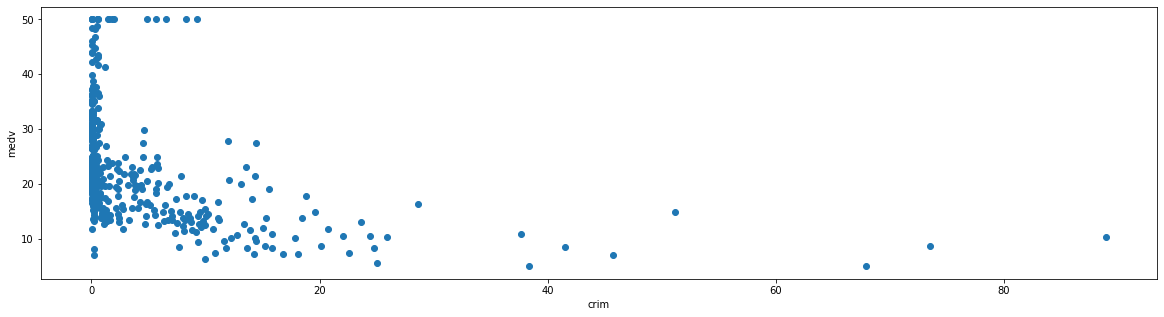

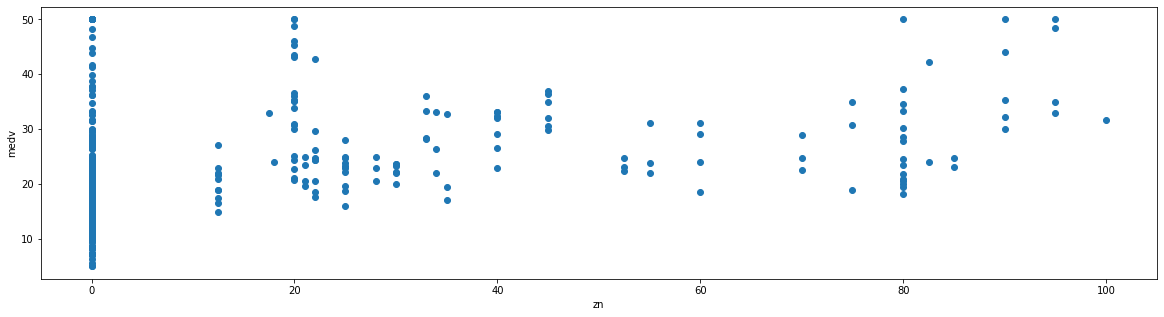

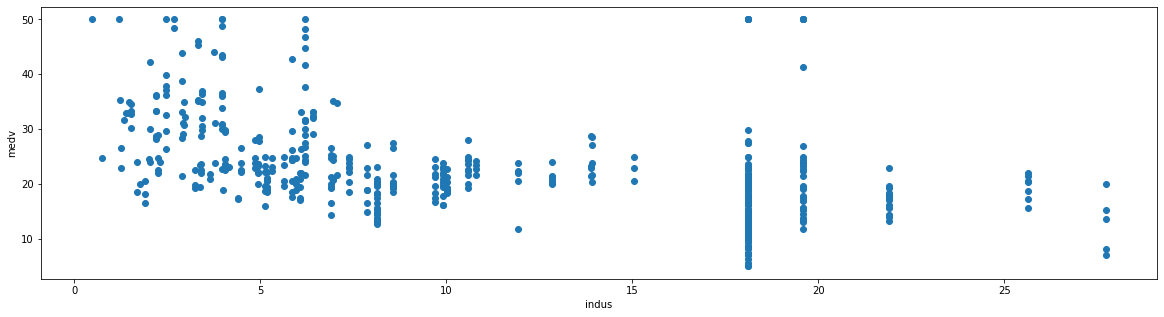

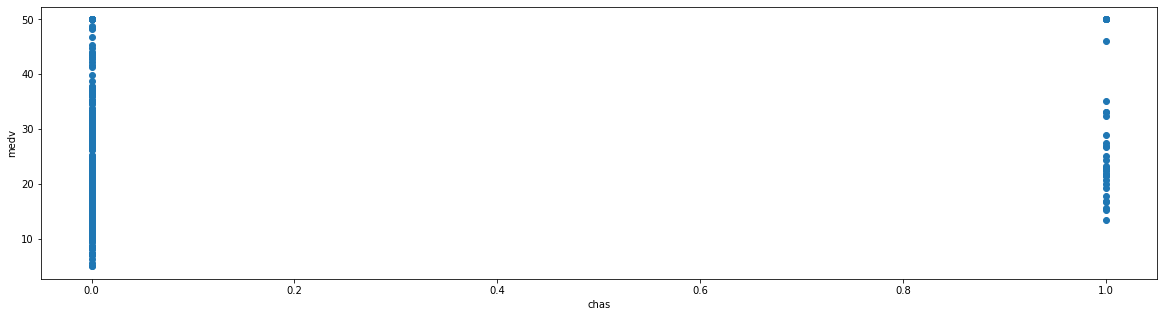

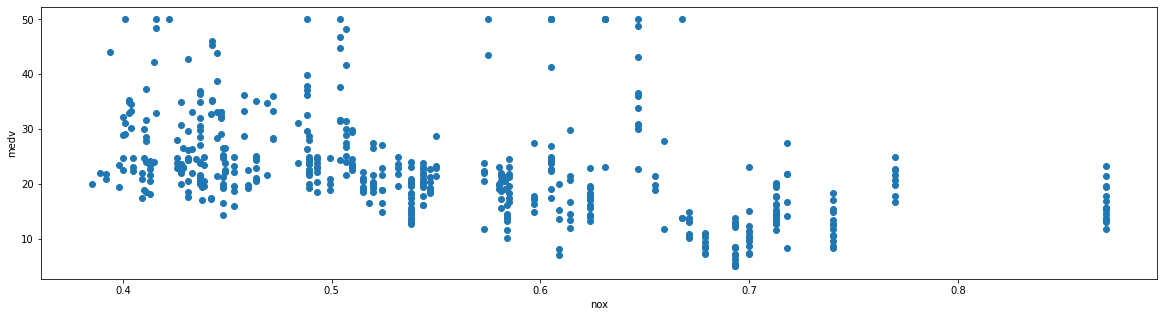

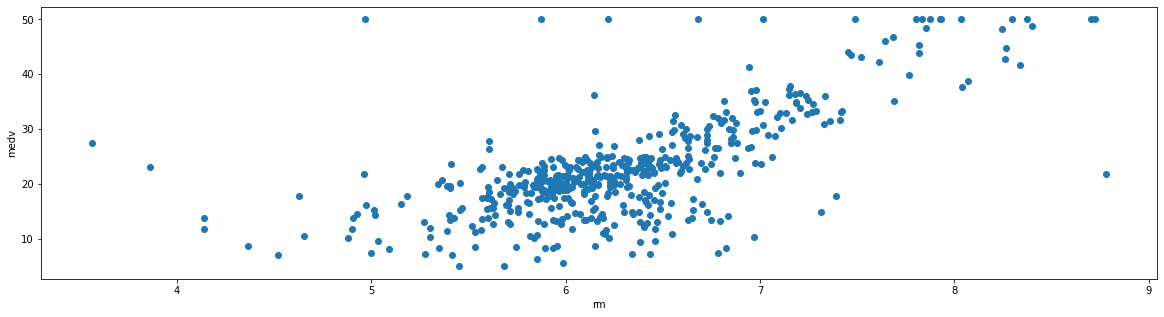

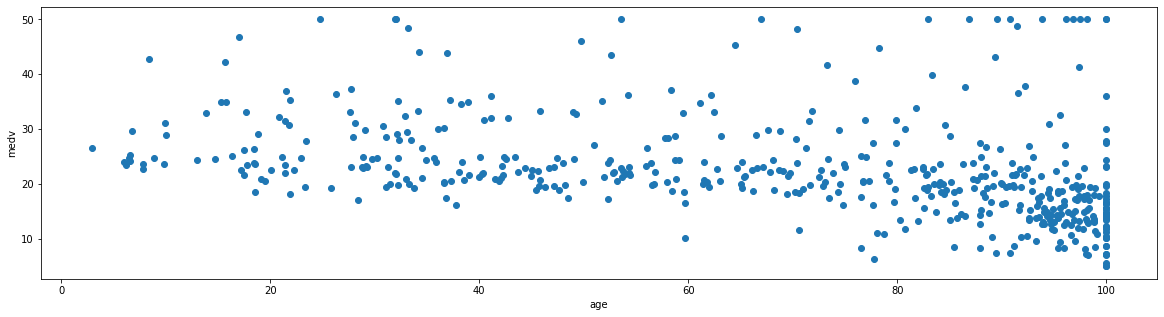

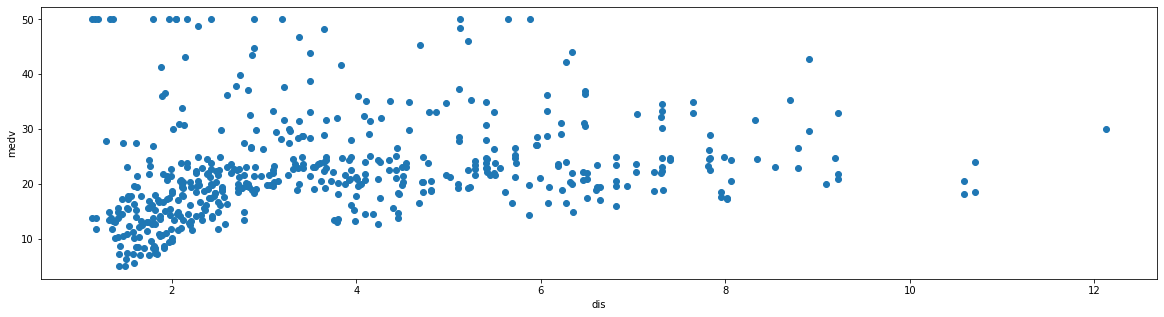

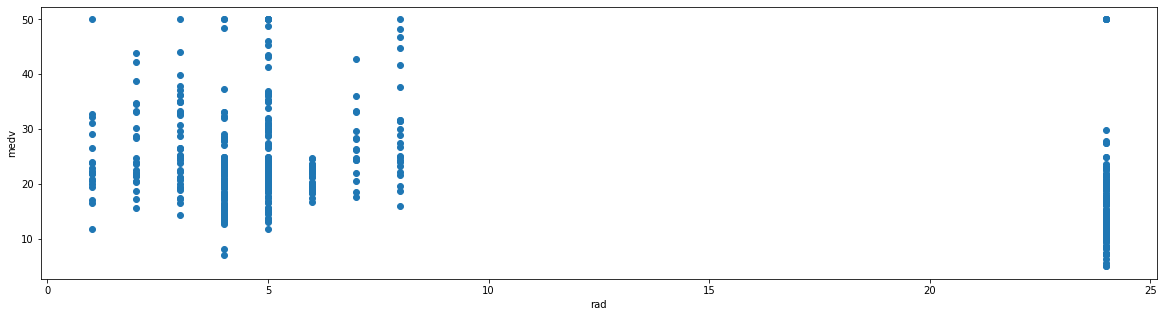

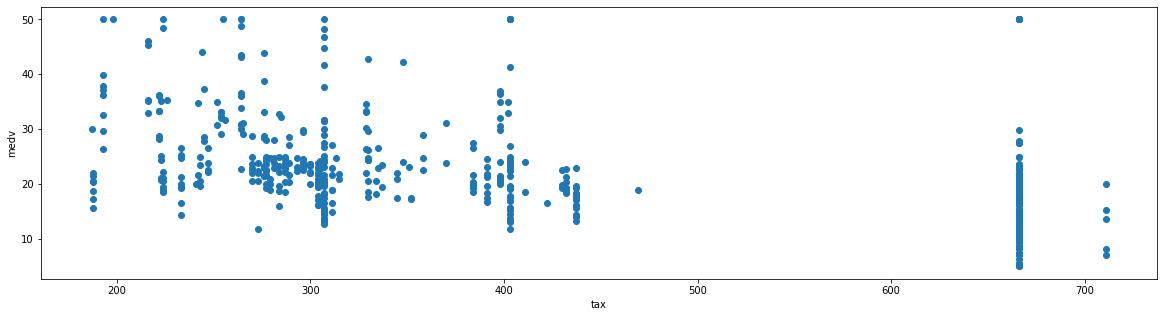

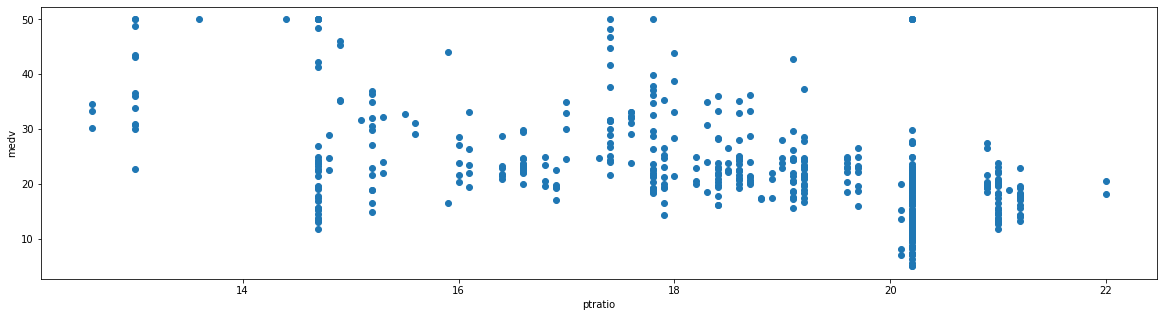

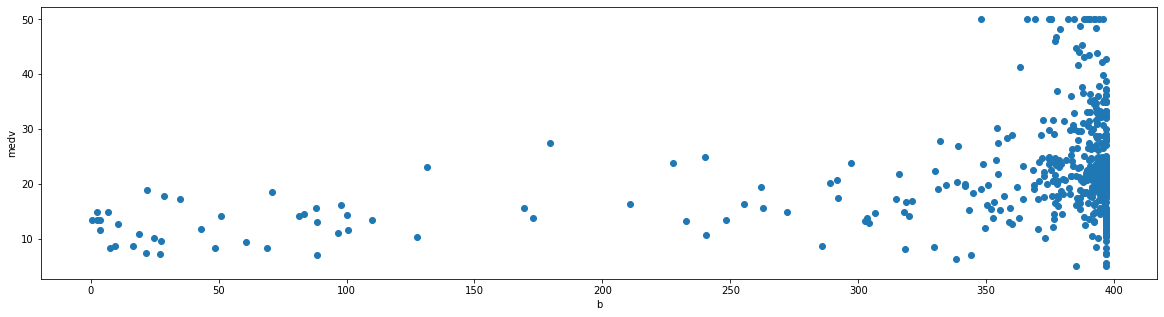

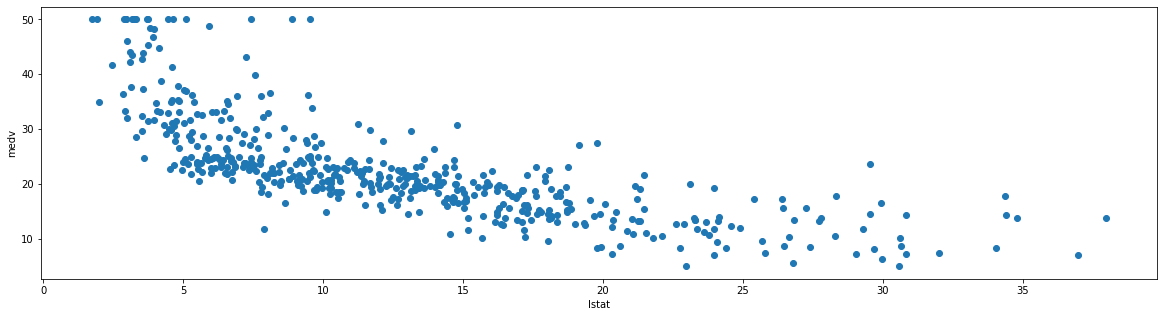

In [7]:

for column in df.columns[:-1]:
    plt.figure(figsize=(20, 5))
    if df[column].dtype in [np.int64, np.float64]: # only plot numeric columns
        plt.scatter(df[column],df['medv'])
        plt.xlabel(column)
        plt.ylabel("medv")
        plt.show()
        


In [8]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'medv']
y = df.loc[:, df.columns == 'medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(32, activation='relu', name='dense_3'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_output (Dense)        (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 561.7121 - mae: 21.8259 - val_loss: 556.8811 - val_mae: 21.7060
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 476.7548 - mae: 19.7723 - val_loss: 435.3054 - val_mae: 18.8652
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 327.9525 - mae: 15.8641 - val_loss: 236.6053 - val_mae: 13.1662
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 144.9818 - mae: 9.7798 - val_loss: 63.3334 - val_mae: 6.2139
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 70.4483 - mae: 6.5301 - val_loss: 37.6187 - val_mae: 5.3354
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 45.9354 - mae: 5.0352 - val_loss: 27.1467 - val_mae: 4.5658
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 32.5167 - mae: 4.1614 - val_loss: 20.0602 - val_mae: 3.8719
Epoch 8/100
11/11 [==============================] - 0s

11/11 [==============================] - 0s 5ms/step - loss: 6.5051 - mae: 1.8404 - val_loss: 13.2978 - val_mae: 2.4953
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: 6.1752 - mae: 1.7817 - val_loss: 12.1226 - val_mae: 2.3611
Epoch 64/100
11/11 [==============================] - 0s 7ms/step - loss: 6.2837 - mae: 1.8127 - val_loss: 13.7341 - val_mae: 2.5505
Epoch 65/100
11/11 [==============================] - 0s 6ms/step - loss: 6.1858 - mae: 1.7842 - val_loss: 11.6047 - val_mae: 2.2804
Epoch 66/100
11/11 [==============================] - 0s 6ms/step - loss: 6.1567 - mae: 1.8056 - val_loss: 12.5588 - val_mae: 2.4088
Epoch 67/100
11/11 [==============================] - 0s 6ms/step - loss: 5.9271 - mae: 1.7364 - val_loss: 12.8782 - val_mae: 2.4410
Epoch 68/100
11/11 [==============================] - 0s 6ms/step - loss: 5.9208 - mae: 1.7444 - val_loss: 14.5549 - val_mae: 2.6081
Epoch 69/100
11/11 [==============================] - 0s 6ms/step - loss: 5.9704 -

In [12]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)


5/5 [==============================] - 0s 2ms/step - loss: 17.3920 - mae: 2.6589
Mean squared error on test data:  17.392005920410156
Mean absolute error on test data:  2.6588802337646484


In [13]:
model.predict(sc.transform([[0.33147,0,6.2,0,0.507,8.247,70.4,3.6519,8,307,17.4,378.95,3.95]]))

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[44.654793]], dtype=float32)

In [14]:
model.predict(sc.transform([[0.7842,0,8.14,0,0.538,5.99,81.7,4.2579,4,307,21,386.75,14.67,]]))

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[16.017855]], dtype=float32)